Overview of modelling process
1. Importing required libraries like sklearn etc. and uploading data set as pandas data frame
2. Visualize the dataset across 2 most important variables
3. Split data set into train and test. Build function for model fit, and calculation of important metrics like accuracy, precision, recall, ROC-AUC etc.
4. Decision Tree classifier: Visualization, parameter tuning using grid search and model building
5. K-nearest neigbors: Visualization, missclassification error for training/testing across values of k and model building
6. Logistic Regression: Visualization, regularization and model building
7. Model comparison for decision tree, KNN and logistic regression

#### Importing libraries and reading data set

In [22]:
# Importi required libraries
%matplotlib inline
from sklearn import tree, neighbors, datasets, linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn import metrics, linear_model
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Create column names for pandas dataframe
vec1=["mean","sd","worst"]
vec2 = ['radius','texture','perimeter','area','smoothness','compactness',
            'concavity','concave_points','symmertry','fractal_dimension']
features = [i+"_"+j for i in vec2 for j in vec1]
column_names = ["Diagnosis"]+ features

# Read data set into pandas dataframe
data = pd.read_csv("wdbc.data",names=column_names)
print("Dimension of data",data.shape)
data.head(5)

Dimension of data (569, 31)


,Diagnosis,radius_mean,radius_sd,radius_worst,texture_mean,texture_sd,texture_worst,perimeter_mean,perimeter_sd,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd,concave_points_worst,symmertry_mean,symmertry_sd,symmertry_worst,fractal_dimension_mean,fractal_dimension_sd,fractal_dimension_worst
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Visualization of the data set

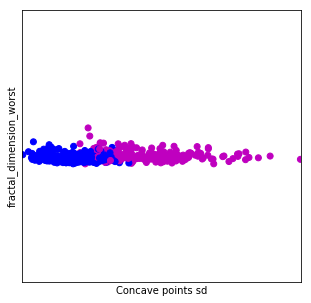

In [23]:
# we only take the two features.
X = data[['concave_points_sd','fractal_dimension_worst']]
Y = data['Diagnosis']

# For area of chart
x_min, x_max = X['concave_points_sd'].min() - .5, X['concave_points_sd'].max() + .5
y_min, y_max = X['fractal_dimension_worst'].min() - .5, X['fractal_dimension_worst'].max() + .5
# .5 for boundary

plt.figure(2, figsize=(5, 5))
plt.clf()

# Plot the training points
plt.scatter(X['concave_points_sd'], X['fractal_dimension_worst'],
            c=Y, cmap=plt.cm.Paired)
plt.xlabel('Concave points sd')
plt.ylabel('fractal_dimension_worst')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### Split data set, build function for model fit and accuracy calculation

In [24]:
# Split dataset into 80-20
train_data, test_data = train_test_split(data,
                                         test_size=0.20,
                                         random_state=123)
print("Train",train_data.shape)
print("Test",test_data.shape)

# Create variables for subsetting data set
target = 'Diagnosis'
predictors = features

# Create mode_fit function for decision tree, knn and logistic regression
# Performs cross validation and gives accuracy on training data
# Calculate important metrics like testing accuracy, roc-auc, f1-measure
def model_fit(alg,train,test,predictors,target,feature_imp):
    #fit model
    alg.fit(train[predictors],train[target])
    
    #predict using model
    train_predictions=alg.predict(train[predictors])
    train_pred_prob=alg.predict_proba(train[predictors])[:,1]
    
    #print report
    print("Training Accuracy: ",round(metrics.accuracy_score(
        train[target].values,train_predictions),2))
    
    # Will be used for only decision tree
    if feature_imp==1:
        feat_imp=pd.Series(alg.feature_importances_,
                           predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importance')
        plt.ylabel('Feature Importance Score')
        
    # Predict using testing dataset
    test['Diagnosis_pred']=alg.predict(test[predictors])
    test['Diagnosis_pred_proba']=alg.predict_proba(test[predictors])[:,1]
    
    # Calculate accuracy score on predicted values
    test_accuracy = alg.score(test[predictors], test[target])
    print("Testing Accuracy: ", round(test_accuracy,2))
    
    print("ROC-AUC: ", round(metrics.roc_auc_score(
        test[target].values,test['Diagnosis_pred_proba'].values),2))
    
    print("Classification Report:")
    print(metrics.classification_report(test[target].values,
                                        test['Diagnosis_pred'].values))
    
    print("Confusion Matrix: ")
    print(pd.DataFrame(metrics.confusion_matrix(test[target].values,
                                    test['Diagnosis_pred'].values)))
    print("Labels: M - 1 | B - 0")

Train (455, 31)
Test (114, 31)


#### Decision Tree classifier

Decision Boundary Visualization

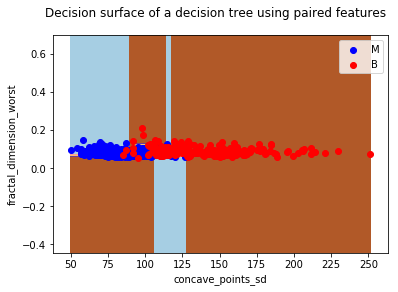

In [25]:
# Plot the decision surface of a decision tree
plot_colors = "bry"
plot_step = 0.02  # step size in the mesh
X = data[['concave_points_sd','fractal_dimension_worst']] # We only take the two corresponding features
y = data['Diagnosis']
n_classes = len(set(y))

# Train
clf = tree.DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary. 
# For that, we will assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max].   
x_min, x_max = X['concave_points_sd'].min() - .5,X['concave_points_sd'].max() + .5
y_min, y_max = X['fractal_dimension_worst'].min() - .5,X['fractal_dimension_worst'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
#Use meshgrid for grid of areas
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z[Z=="M"] = 1
Z[Z=="B"] = 0
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('concave_points_sd')
plt.ylabel('fractal_dimension_worst')
plt.axis("tight")
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    if i== 0:
        val="B"
    else:
        val="M"
    #idx = np.where(y == val)
    plt.scatter(X[y==val]["concave_points_sd"].values,
                X[y==val]["fractal_dimension_worst"].values,
                c=color, label=["M","B"][i],
                cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

Overfitting and Underfitting due to depth of tree

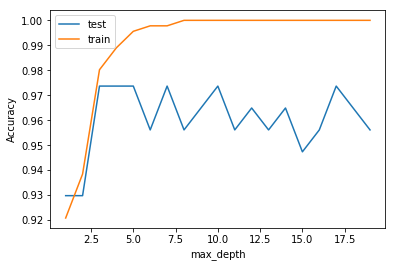

In [26]:
complexity_values = range(1,20)
train_accuracies = []
test_accuracies=[]
for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="gini",
                                      max_depth=complexity_value)
    test_accuracies.append(clf.fit(train_data[predictors],
        train_data[target]).score(test_data[predictors],
                                  test_data[target]))
    
    train_accuracies.append(clf.fit(train_data[predictors],
        train_data[target]).score(train_data[predictors],
                                  train_data[target]))
    
# We want to plot our results
line1, =plt.plot(complexity_values, test_accuracies,
                 label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,
                 label='train_accuracies')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

Paramater tuning using grid search

In [27]:
param_test={'max_depth':list(range(1,20,1)),
            'criterion':('gini','entropy')}
f1_scorer = metrics.make_scorer(metrics.f1_score, pos_label="M")
gsearch=GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=10),
                      param_grid=param_test,
                      scoring=f1_scorer,
                      n_jobs=4,
                      iid=True,
                      cv=10)
gsearch.fit(train_data[predictors],train_data[target])
print("Best Score:",gsearch.best_score_)
print("Best parameters:",gsearch.best_params_)

Best Score: 0.9273311655664597
Best parameters: {'criterion': 'gini', 'max_depth': 7}


Final model after tuning

Final decision tree model 

Training Accuracy:  0.98
Testing Accuracy:  0.97
ROC-AUC:  0.95
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        73
           M       0.97      0.95      0.96        41

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix: 
    0   1
0  72   1
1   2  39
Labels: M - 1 | B - 0


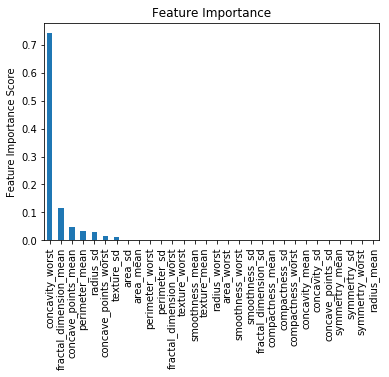

In [28]:
decision_tree_model=tree.DecisionTreeClassifier(criterion="gini",
                                                max_depth=7,
                                               min_impurity_decrease=0.005)
print('Final decision tree model \n')
model_fit(decision_tree_model,train_data,test_data,predictors,target,1)

#### KNN Classifier

Visualization of the decision boundaries for multiple k values

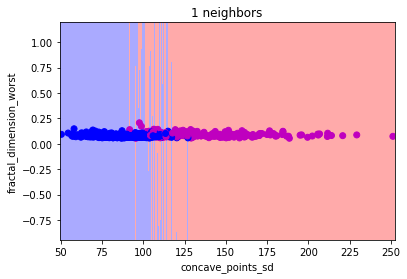

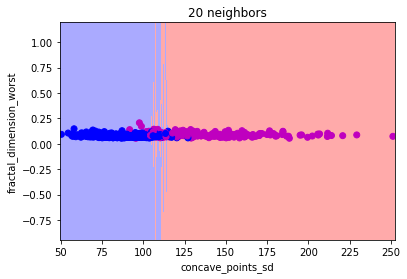

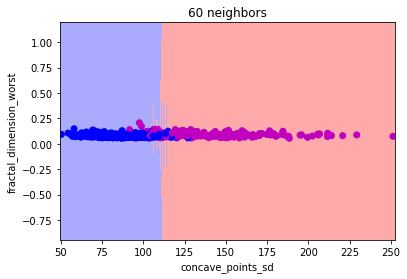

In [29]:
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF', '#00FF00'])
 # We only take the two corresponding features
X = data[['concave_points_sd','fractal_dimension_worst']]
y = data['Diagnosis']

weights = 'distance'
#for weights in ['uniform', ]: 
for n_neighbors in [1,20,60]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    # we train model with two variables to visualize decision boundaries
    clf.fit(X, Y) 

    # Plot the decision boundary. 
    # For that, we will assign a color to each point in the mesh
    x_min, x_max = X['concave_points_sd'].min() - 1,X['concave_points_sd'].max() + 1
    y_min, y_max = X['fractal_dimension_worst'].min() - 1,X['fractal_dimension_worst'].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z[Z=="M"] = 1
    Z[Z=="B"] = 0
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z.astype(float), cmap=cmap_light)
    plt.title(str(n_neighbors)+' neighbors')
    plt.xlabel('concave_points_sd')
    plt.ylabel('fractal_dimension_worst')
    # Plot also the training points
    plt.scatter(X['concave_points_sd'], X['fractal_dimension_worst'],
                c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
plt.show()

Plot missclassification error against neigbors

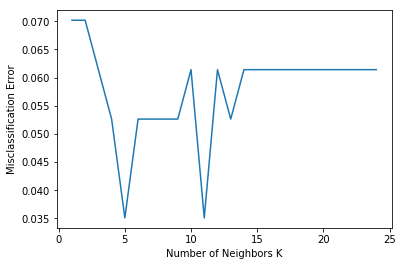

In [30]:
test_scores = []
k_range = list(range(1, 25, 1))
accuracy_metric = metrics.make_scorer(metrics.accuracy_score)#, pos_label="M")
for k in k_range:
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(train_data[predictors],train_data[target])
    error = model.score(test_data[predictors], test_data[target])
    test_scores.append(1-error)
# plot misclassification error vs k
plt.plot(k_range, test_scores)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

Paramater tuning using grid search

In [31]:
param_test ={'n_neighbors':list(range(1,20)),
             'weights':('uniform','distance')}

f1_scorer = metrics.make_scorer(metrics.f1_score, pos_label="M")
gsearch=GridSearchCV(estimator=neighbors.KNeighborsClassifier(),
                      param_grid=param_test,
                      scoring=f1_scorer,
                      n_jobs=4,
                      iid=True,
                      cv=10)
gsearch.fit(train_data[predictors],train_data[target])
print("Best Score:",gsearch.best_score_)
print("Best parameters:",gsearch.best_params_)

Best Score: 0.9020641710586654
Best parameters: {'n_neighbors': 5, 'weights': 'uniform'}


Final model after tuning

In [32]:
knn=neighbors.KNeighborsClassifier(n_neighbors=5,weights='uniform')
print("KNN model with 5 neighbors\n")
model_fit(knn,train_data,test_data,predictors,target,0)

KNN model with 5 neighbors

Training Accuracy:  0.94
Testing Accuracy:  0.96
ROC-AUC:  0.97
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        73
           M       0.97      0.93      0.95        41

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix: 
    0   1
0  72   1
1   3  38
Labels: M - 1 | B - 0


#### Logistic Regression

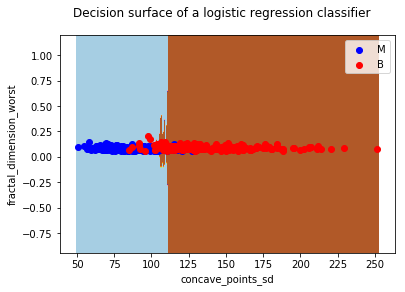

In [33]:
## Decision Boundary Visualization
plot_colors = "bry"
plot_step = 0.02  # step size in the mesh
# We only take the two corresponding features
X = data[['concave_points_sd','fractal_dimension_worst']]
y = data['Diagnosis']
n_classes = len(set(y))

# we train again model with two variables to visualize decision boundaries
clf = clf.fit(X, y) 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].   
x_min, x_max = X['concave_points_sd'].min() - 1, X['concave_points_sd'].max() + 1
y_min, y_max = X['fractal_dimension_worst'].min() - 1, X['fractal_dimension_worst'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z[Z=="M"] = 1
Z[Z=="B"] = 0
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel('concave_points_sd')
plt.ylabel('fractal_dimension_worst')
plt.axis("tight")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    if i== 0:
        val="B"
    else:
        val="M"
    #idx = np.where(y == val)
    plt.scatter(X[y==val]["concave_points_sd"].values,
                X[y==val]["fractal_dimension_worst"].values,
                c=color, label=["M","B"][i],
                cmap=plt.cm.Paired)

plt.axis("tight")
plt.suptitle("Decision surface of a logistic regression classifier")
plt.legend()
plt.show()

Paramater tuning using grid search

In [34]:
param_test ={'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'penalty':('l1','l2')}

lr=linear_model.LogisticRegression(random_state=10,multi_class='ovr')
f1_scorer = metrics.make_scorer(metrics.f1_score, pos_label="M")
gsearch=GridSearchCV(estimator=lr,
                      param_grid=param_test,
                      scoring=f1_scorer,
                      n_jobs=4,
                      iid=True,
                      cv=10)
gsearch.fit(train_data[predictors],train_data[target])
print("Best Score:",gsearch.best_score_)
print("Best parameters:",gsearch.best_params_)

Best Score: 0.9496425773106445
Best parameters: {'C': 10, 'penalty': 'l1'}


Final model after tuning

In [35]:
logistic_regression = linear_model.LogisticRegression(C=10,penalty='l1',multi_class='ovr')
model_fit(logistic_regression,train_data,test_data,predictors,target,0)

Training Accuracy:  0.98
Testing Accuracy:  0.98
ROC-AUC:  0.99
Classification Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        73
           M       1.00      0.95      0.97        41

   micro avg       0.98      0.98      0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix: 
    0   1
0  73   0
1   2  39
Labels: M - 1 | B - 0


#### Conclusion - Model Comparison

| Model Name | Training Accuracy | Testing Accuracy | ROC-AUC | F1-score (B) | F1-score (M)
| --- | --- | --- | --- | --- | --- |
| Decision Tree | 98% | 97% | 95% | 98% | 96%
| KNN | 94% | 96% | 97% | 97% | 95%
| Logistic | 98% | 98% | 99% | 99% | 97%

Logistic Regression turns out to be best model as accuracy is better across all metrics and there is no missclassification of malignant patients which fulfills our objective to detect malignant patients.